In [1]:
import jar

In [2]:
import pandas as pd
import numpy as np

In [68]:
pickles = ['1_16', '17_30', '31_60', '61_90', '91_107', '108_122', '123_140', '141_156', '157_160', '161_176', '176_191', '192_207', '208_222', '223_238', '238_250', \
          '251_266', '267_282', '283_298', '299_314', '315_330', '331_346', '347_362', '363_378', '379_394', '395_410', '411_426', '427_442', '443_458',\
          '459_474', '475_490', '491_506', '507_522', '523_538', '539_554', '555_570', '571_586', '587_602', '603_618', '619_634', '635_650', '651_666',\
          '667_682', '683_698', '699_714', '715_730', '731_746', '747_762', '763_778', '779_794', '795_810', '811_826', '827_842', '843_858', '859_874', \
          '875_890', '891_906', '907_922', '923_938', '939_954', '955_970', '971_986', '987_1002', '1003_1018', '1019_1034', '1035_1050', '1051_1066', \
          '1067_1082', '1083_1098', '1099_1114', '1115_1130', '1131_1146', '1147_1162', '1163_1178', '1179_1194', '1195_1210', '1211_1226', '1227_1242', \
          '1243_1258', '1259_1274', '1275_1290', '1291_1306', '1307_1322', '1323_1338', '1339_1354','1355_1370', '1371_1386', '1387_1402', '1403_1418', \
          '1419_1434', '1435_1450', '1451_1466', '1467_1482', '1483_1498']

In [69]:
df = jar.jar_open(pickles)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27745 entries, 0 to 299
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             27674 non-null  object
 1   style             27745 non-null  object
 2   Original Gravity  27745 non-null  object
 3   Final Gravity     27745 non-null  object
 4   ABV (standard)    27004 non-null  object
 5   IBU (tinseth)     26546 non-null  object
 6   SRM (morey)       25383 non-null  object
 7   Mash pH           27745 non-null  object
 8   hops              27702 non-null  object
 9   others            27616 non-null  object
 10  water             27394 non-null  object
 11  notes             27630 non-null  object
 12  IBU (rager)       1199 non-null   object
 13  SRM (daniels)     918 non-null    object
 14  SRM (ebcmorey)    1108 non-null   object
 15  SRM (mosher)      336 non-null    object
 16  ABV (alternate)   741 non-null    object
 17  yeast         

In [71]:
df['IBU (tinseth)'] = pd.to_numeric(df['IBU (tinseth)'])
#df['Original Gravity'] = pd.to_numeric(df['Original Gravity'])
#df['Final Gravity'] = pd.to_numeric(df['Final Gravity'])
df['SRM (morey)'] = pd.to_numeric(df['SRM (morey)'])
#df['Mash pH'] = pd.to_numeric(df['Mash pH'])

In [72]:
df=df.rename(columns={'ABV (standard)':'abv'})
df=df.rename(columns={'IBU (tinseth)':'ibu'})

In [7]:
df.loc[df.duplicated(subset=['notes', 'title']), ['notes', 'title']] = np.nan

In [279]:
df.title.sample(20)

103                           m00ps Sunny D I
306                   Stone Ruination IPA Clo
138                          Hard Knocks Marz
204                               Oatmeal Amb
210                                       NaN
76                             COMMON MAN'S A
10                              Blue Moon Clo
298                     Pictures of Hemorrhoi
283                                    Batch 
69               Traquair House Style Wee Hea
153    1 minute boil Conan Centennial Hop Jui
33                                        NaN
248              She's not Hefe She's my Weiz
239                             Honey Brown A
259       D9D Rogue Chocolate Stout ▲▲ 03.04.
124          Amarillo, Simcoe, Hull Melon NEI
17                           Mogs cottage cid
78              Grey Squirrel Kentish Brown A
180                        Cream Of Three Cro
41                                        NaN
Name: title, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27145 entries, 0 to 299
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             18192 non-null  object 
 1   style             27145 non-null  object 
 2   Original Gravity  27145 non-null  object 
 3   Final Gravity     27145 non-null  object 
 4   abv               26422 non-null  object 
 5   ibu               25971 non-null  float64
 6   SRM (morey)       24841 non-null  float64
 7   Mash pH           27145 non-null  object 
 8   hops              27102 non-null  object 
 9   others            27017 non-null  object 
 10  water             26796 non-null  object 
 11  notes             18164 non-null  object 
 12  IBU (rager)       1174 non-null   object 
 13  SRM (daniels)     904 non-null    object 
 14  SRM (ebcmorey)    1076 non-null   object 
 15  SRM (mosher)      324 non-null    object 
 16  ABV (alternate)   723 non-null    object 


In [281]:
from wordcloud import WordCloud

In [73]:
notes_str = str(df.hops)

wordcloud = WordCloud().generate(notes_str)

# Display the generated image:
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [74]:
df.hops = df.hops.astype(str)
df.others = df.others.astype(str)
df.water = df.water.astype(str)
df.notes = df.notes.astype(str)
df.yeast = df.yeast.astype(str)

In [75]:
df = df.rename(columns = {'style': 'bstyle', 'Original Gravity': 'og', 'Final Gravity':'fg'})

In [76]:
df['chal'] = np.where(df.hops.str.contains('Challenger') | df.hops.str.contains('challenger'), 1,0)

In [77]:
df['citra'] = np.where(df.hops.str.contains('Citra') | df.hops.str.contains('citra'), 1,0)

In [78]:
df['warrior'] =  np.where(df.hops.str.contains('Warrior') | df.hops.str.contains('warrior'), 1,0)

In [79]:
df['casc'] =  np.where(df.hops.str.contains('Cascade') | df.hops.str.contains('cascade'), 1,0)

In [80]:
df['saaz'] =  np.where(df.hops.str.contains('Saaz') | df.hops.str.contains('saaz'), 1,0)

In [81]:
df['azacca'] =  np.where(df.hops.str.contains('Azacca') | df.hops.str.contains('azacca'), 1,0)

In [82]:
df['colum'] = np.where(df.hops.str.contains('Columbus') | df.hops.str.contains('columbus'), 1,0)

In [83]:
df['mag'] = np.where(df.hops.str.contains('Magnum') | df.hops.str.contains('magnum'), 1,0)

In [84]:
df['perle'] = np.where(df.hops.str.contains('Perle') | df.hops.str.contains('perle'), 1,0)

In [85]:
df['simcoe'] =  np.where(df.hops.str.contains('Simcoe') | df.hops.str.contains('simcoe'), 1,0)

In [86]:
df['amar'] =  np.where(df.hops.str.contains('Amarillo') | df.hops.str.contains('amarillo'), 1,0)
df['cashmere'] =  np.where(df.hops.str.contains('Cashmere') | df.hops.str.contains('cashmere'), 1,0)
df['comet'] =  np.where(df.hops.str.contains('Comet') | df.hops.str.contains('comet'), 1,0)
df['galaxy'] =  np.where(df.hops.str.contains('Galaxy') | df.hops.str.contains('galaxy'), 1,0)

In [87]:
df['apollo'] =  np.where(df.hops.str.contains('Apollo') | df.hops.str.contains('apollo'), 1,0)
df['willam'] =  np.where(df.hops.str.contains('Willamette') | df.hops.str.contains('willamette'), 1,0)
df['goldings'] =  np.where(df.hops.str.contains('Goldings') | df.hops.str.contains('goldings'), 1,0)
df['heller'] =  np.where(df.hops.str.contains('Hellertau') | df.hops.str.contains('hellertau'), 1,0)
df['fug'] =  np.where(df.hops.str.contains('Fuggles') | df.hops.str.contains('fuggles'), 1,0)
df['nugg'] =  np.where(df.hops.str.contains('Nugget') | df.hops.str.contains('nugget'), 1,0)
df['hopshot'] =  np.where(df.hops.str.contains('HopShot') | df.hops.str.contains('hopshot'), 1,0)
df['tett'] =  np.where(df.hops.str.contains('Tettnanger') | df.hops.str.contains('tettnanger'), 1,0)
df['mosaic'] =  np.where(df.hops.str.contains('Mosiac') | df.hops.str.contains('mosaic'), 1,0)
df['brewerg'] =  np.where(df.hops.str.contains("Brewer's Gold") | df.hops.str.contains("brewer's gold"), 1,0)
df['northb'] =  np.where(df.hops.str.contains("Northern Brewer") | df.hops.str.contains("northern brewer"), 1,0)
df['cent'] =  np.where(df.hops.str.contains("Centennial") | df.hops.str.contains("centennial"), 1,0)
df['chinook'] = np.where(df.hops.str.contains("Chinook") | df.hops.str.contains("chinook"), 1,0)
df['crystal'] = np.where(df.hops.str.contains("Crystal") | df.hops.str.contains("crystal"), 1,0)
df['magnum'] = np.where(df.hops.str.contains("Magnum") | df.hops.str.contains("magnum"), 1,0)
df['chinook'] = np.where(df.hops.str.contains("Chinook") | df.hops.str.contains("chinook"), 1,0)
df['ctz'] = np.where(df.hops.str.contains("CTZ") | df.hops.str.contains("ctz"), 1,0)
df['styr'] = np.where(df.hops.str.contains("Styrian") | df.hops.str.contains("styrian"), 1,0)
df['idaho'] = np.where(df.hops.str.contains("Idaho") | df.hops.str.contains("idaho"), 1,0)
df['nelson'] = np.where(df.hops.str.contains("Nelson") | df.hops.str.contains("nelson"), 1,0)
df['exper'] = np.where(df.hops.str.contains("Experimental") | df.hops.str.contains("experimental"), 1,0)
df['hall'] = np.where(df.hops.str.contains("Hall Mitt") | df.hops.str.contains("Hall mitt") | df.hops.str.contains("hall mitt"), 1,0)
df['noble'] =  np.where(df.hops.str.contains("Noble") | df.hops.str.contains("noble"), 1,0)

df['dryh'] =  np.where(df.hops.str.contains("Dry Hop") | df.hops.str.contains("Dry hop") | df.hops.str.contains("dry hop"), 1,0)

In [88]:
df['lact'] = np.where(df.others.str.contains('Lactose') | df.hops.str.contains('lactose'), 1,0)

In [89]:
cmpx = []
for index, row in df.iterrows():
    cmp = len((row.hops.strip()))/10
    cmpx.append(cmp)

df['hopcmp'] = cmpx

## Title descriptors

In [90]:
df['clone'] = np.where(df.title.str.contains('Clone') | df.title.str.contains('clone'), 1,0)

In [91]:
df=df.rename(columns={'SRM (morey)':'srm'})

In [92]:
df['juicy'] =  np.where(df.notes.str.contains('Juicy') | df.notes.str.contains('juicy') | df.notes.str.contains('Juice') | df.notes.str.contains('juice'), 1,0)
df['dank'] =  np.where(df.notes.str.contains('Dank') | df.notes.str.contains('dank')  | df.notes.str.contains('weed')  | df.notes.str.contains('marijuana')  | df.notes.str.contains('cannabis')  | df.notes.str.contains('420') | df.notes.str.contains('Resin') | df.notes.str.contains('resin'), 1,0)
df['wedding'] =  np.where(df.notes.str.contains('Wedding') | df.notes.str.contains('wedding') | df.notes.str.contains('Marriage') | df.notes.str.contains('marriage'), 1,0)
df['whisk'] =  np.where(df.notes.str.contains('Whisky') | df.notes.str.contains('whisky') | df.notes.str.contains('Whiskey')| df.notes.str.contains('whiskey'), 1,0)
df['trop'] =  np.where(df.notes.str.contains('Tropical') | df.notes.str.contains('tropical') | df.notes.str.contains('mango') | df.notes.str.contains('papaya') | df.notes.str.contains('orange') | df.notes.str.contains('lemon') | df.notes.str.contains('citrus') | df.notes.str.contains('pineapple'), 1,0)
df['award'] =  np.where(df.notes.str.contains('Award Winning') | df.notes.str.contains('Award winning') | df.notes.str.contains('award winning')| df.notes.str.contains('Champion') | df.notes.str.contains('champion'), 1,0)
df['best'] =  np.where(df.notes.str.contains('Best') | df.notes.str.contains('best'), 1,0)
df['smoke'] =  np.where(df.notes.str.contains('Smoke') | df.notes.str.contains('smoke') | df.notes.str.contains('Smoky') | df.notes.str.contains('smoky') | df.notes.str.contains('fire') | df.notes.str.contains('scotch') | df.notes.str.contains('peat'), 1,0)
df['roast'] =  np.where(df.notes.str.contains('Roast') | df.notes.str.contains('roast'), 1,0)
df['thick'] =  np.where(df.notes.str.contains('Thick') | df.notes.str.contains('thick'), 1,0)
df['pine'] =  np.where(df.notes.str.contains('Pine') | df.notes.str.contains('pine'), 1,0)
df['sticky'] =  np.where(df.notes.str.contains('Sticky') | df.notes.str.contains('sticky'), 1,0)
df['foam'] =  np.where(df.notes.str.contains('Foamy') | df.notes.str.contains('foam') | df.notes.str.contains('head'), 1,0)
df['hoppy'] =  np.where(df.notes.str.contains('Hoppy') | df.notes.str.contains('hoppy') | df.notes.str.contains('IBU'), 1,0)
df['choco'] =  np.where(df.notes.str.contains('Choco') | df.notes.str.contains('choco'), 1,0)
df['coffee'] =  np.where(df.notes.str.contains('Coffee') | df.notes.str.contains('coffee') | df.notes.str.contains('Espresso') | df.notes.str.contains('espresso'), 1,0)
df['straw'] =  np.where(df.notes.str.contains('Straw') | df.notes.str.contains('straw') | df.notes.str.contains('grass'), 1,0)
df['bisc'] =  np.where(df.notes.str.contains('Biscuit') | df.notes.str.contains('biscuit'), 1,0)
df['dark'] =  np.where(df.srm >= 20, 1,0)

In [93]:
df['heavy'] =  np.where(df.notes.str.contains('Heavy') | df.notes.str.contains('heavy'), 1,0)
df['stfruit'] =  np.where(df.notes.str.contains('Stonefruit') | df.notes.str.contains('stonefruit') | df.notes.str.contains('Stone fruit') | df.notes.str.contains('stone fruit') | df.notes.str.contains('peach') | df.notes.str.contains('apricot'), 1,0)
df['hazy'] =  np.where(df.notes.str.contains('Hazy') | df.notes.str.contains('hazy'), 1,0)
df['pheno'] =  np.where(df.notes.str.contains('Phenolic') | df.notes.str.contains('phenolic'), 1,0)
df['ester'] =  np.where(df.notes.str.contains('Ester') | df.notes.str.contains('ester'), 1,0)
df['banana'] =  np.where(df.notes.str.contains('Banana') | df.notes.str.contains('banana'), 1,0)
df['bitter'] =  np.where(df.notes.str.contains('Bitter') | df.notes.str.contains('bitter'), 1,0)
df['clove'] =  np.where(df.notes.str.contains('Clove') | df.notes.str.contains('clove'), 1,0)
df['sour'] =  np.where(df.notes.str.contains('Sour') | df.notes.str.contains('sour') | df.notes.str.contains('pucker')| df.notes.str.contains('acid'), 1,0)
df['malt'] =  np.where(df.notes.str.contains('Malt') | df.notes.str.contains('malt'), 1,0)
df['agg'] =  np.where(df.notes.str.contains('Aggressive') | df.notes.str.contains('aggressive'), 1,0)
df['balance'] =  np.where(df.notes.str.contains('Balance') | df.notes.str.contains('balance'), 1,0)
df['complex'] =  np.where(df.notes.str.contains('Complex') | df.notes.str.contains('complex'), 1,0)
df['crisp'] =  np.where(df.notes.str.contains('Crisp') | df.notes.str.contains('crisp'), 1,0)
df['smooth'] =  np.where(df.notes.str.contains('Smooth') | df.notes.str.contains('smooth'), 1,0)
df['diac'] =  np.where(df.notes.str.contains('Diacetyl') | df.notes.str.contains('diacetyl'), 1,0)
df['apple'] =  np.where(df.notes.str.contains('Apple') | df.notes.str.contains('apple') | df.notes.str.contains('Pear') | df.notes.str.contains('pear'), 1,0)
df['floral'] =  np.where(df.notes.str.contains('Floral') | df.notes.str.contains('floral') | df.notes.str.contains('flower'), 1,0)
df['fruity'] =  np.where(df.notes.str.contains('Fruity') | df.notes.str.contains('fruity'), 1,0)
df['robust'] =  np.where(df.notes.str.contains('Robust') | df.notes.str.contains('robust'), 1,0)
df['wood'] =  np.where(df.notes.str.contains('Wood') | df.notes.str.contains('wood') | df.notes.str.contains('Oak')| df.notes.str.contains('oak'), 1,0)
df['vanilla'] =  np.where(df.notes.str.contains('Vanilla') | df.notes.str.contains('vanilla'), 1,0)
df['cherry'] =  np.where(df.notes.str.contains('Cherr') | df.notes.str.contains('cherr'), 1,0)
df['clove'] =  np.where(df.notes.str.contains('Clove') | df.notes.str.contains('clove'), 1,0)
df['funk'] =  np.where(df.notes.str.contains('Funk') | df.notes.str.contains('funk') | df.notes.str.contains('barn') | df.notes.str.contains('blanket'), 1,0)
df['grapef'] =  np.where(df.notes.str.contains('Grapefruit') | df.notes.str.contains('grapefruit'), 1,0)
df['solvent'] =  np.where(df.notes.str.contains('Solvent') | df.notes.str.contains('solvent'), 1,0)

In [95]:
df.abv = df.abv.str.replace('%', '')
df['abv'] = pd.to_numeric(df['abv'])

In [99]:
df[df.citra == 1].ibu.mean() - df[df.citra == 0 ].ibu.mean()

16.033409618227765

In [100]:
df[df.citra == 1].abv.mean() - df[df.citra == 0 ].abv.mean()

0.178195570086654

In [101]:
df[df.nugg == 1].abv.mean() - df[df.nugg == 0 ].abv.mean()

0.366870921975039

In [102]:
df['wylon'] = np.where(df.yeast.str.contains('1318'), 1,0)
df['kveik'] = np.where(df.yeast.str.contains('Kveik') | df.yeast.str.contains('kveik') , 1,0)
df['omega'] = np.where(df.yeast.str.contains('Omega') | df.yeast.str.contains('omega') , 1,0)
df['us5'] = np.where(df.yeast.str.contains('US-05') | df.yeast.str.contains('-05') , 1,0)
df['us4'] = np.where(df.yeast.str.contains('US-04') | df.yeast.str.contains('-04') , 1,0)
df['chico'] = np.where(df.yeast.str.contains('Chico') | df.yeast.str.contains('chico')  | df.yeast.str.contains('A07') , 1,0)
df['yeast_dark'] = np.where(df.yeast.str.contains('Darkness') | df.yeast.str.contains('A10'), 1,0)
df['wy1056'] = np.where(df.yeast.str.contains('1056'), 1,0)
df['wy1272'] = np.where(df.yeast.str.contains('1272'), 1,0)
df['wlp080'] = np.where(df.yeast.str.contains('WLP080') | df.yeast.str.contains('WLP 080'), 1,0)
df['wlp80'] = np.where(df.yeast.str.contains('WLP80') | df.yeast.str.contains('WLP 80') , 1,0)
df['vermont'] = np.where(df.yeast.str.contains('Vermont'), 1,0)
df['ylager'] = np.where(df.yeast.str.contains('Lager') | df.yeast.str.contains('lager'), 1,0)
df['ykolsch'] = np.where(df.yeast.str.contains('Kölsch') | df.yeast.str.contains('kölsch') | df.yeast.str.contains('Kolsch') | df.yeast.str.contains('kolsch'), 1,0)

df[df.ykolsch == 1]

,title,bstyle,og,fg,abv,ibu,srm,Mash pH,hops,others,...,us4,chico,yeast_dark,wy1056,wy1272,wlp080,wlp80,vermont,ylager,ykolsch
11,Winter Maple Cream A,Cream Ale,1.075,1.019,7.34,12.82,15.48,,"['1 oz - Northern Brewer', ' Type: Pellet', ' ...","['1 each - Whirlfloc Tab', ' Time: 5 min', ' T...",...,0,0,0,0,0,0,0,0,0,1
12,Anchor Steam Clo,California Common Beer,1.054,1.017,4.90,32.77,NaN,,"['1 oz - Northern Brewer', ' Type: Pellet', ' ...","['1 tsp - Irish Moss', ' Time: 15 min', ' Type...",...,0,0,0,0,0,0,0,0,0,1
125,Kols,Kölsch,1.048,1.012,4.72,24.61,3.02,,"['0.9 oz - Perle', ' Type: Pellet', ' AA: 4.5'...","['0.5 tsp - Irish Moss', ' Time: 15 min', ' Ty...",...,0,0,0,0,0,0,0,0,0,1
126,Kols,Russian Imperial Stout,1.116,1.031,11.10,88.47,31.03,,"['0.9 oz - Perle', ' Type: Pellet', ' AA: 4.5'...","['6 lb - Cherries', ' Type: Flavor', ' Use: Se...",...,0,0,0,0,0,0,0,0,0,1
127,Kols,American IPA,1.063,1.012,6.64,NaN,4.43,,"['1 oz - Chinook', ' Type: Pellet', ' AA: 13',...","['6 lb - Cherries', ' Type: Flavor', ' Use: Se...",...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,German Hefeweiz,Weissbier,1.065,1.018,6.27,16.17,3.75,,"['0.5 oz - Simcoe', ' Type: Pellet', ' AA: 12....","['0.25 oz - Black Pepper crushed', ' Time: 5 m...",...,0,0,0,0,0,0,0,0,0,1
266,German Hefeweiz,Baltic Porter,1.082,1.015,8.85,34.21,32.06,,"['0.5 oz - Simcoe', ' Type: Pellet', ' AA: 12....","['0.25 oz - Black Pepper crushed', ' Time: 5 m...",...,0,0,0,0,0,0,0,0,0,1
230,Devil went down to Gien,American Brown Ale,1.065,1.013,6.77,19.22,33.21,,"['0.75 oz - Cascade', ' Type: Pellet', ' AA: 7...","['2 tsp - Gingerbread Spice', ' Time: 2 min', ...",...,0,0,0,0,0,0,0,0,0,1
269,Carolina Kolsch Tier,Kölsch,1.056,1.013,5.67,23.57,4.20,,"['0.7 oz - Hallertau Hersbrucker', ' Type: Pel...","['1 tsp - Yeast Nutrient', ' Time: 15 min', ' ...",...,0,0,0,0,0,0,0,0,0,1


## Note descriptors

In [103]:
df['ipa'] = np.where(df.bstyle.str.contains('IPA'), 1,0)

In [104]:
df['saison'] = np.where(df.bstyle.str.contains('Saison'), 1, 0)
df['lager'] = np.where(df.bstyle.str.contains('Lager'), 1, 0)
df['stout'] = np.where(df.bstyle.str.contains('Stout'), 1, 0)
df['kolsch'] = np.where(df.bstyle.str.contains('Kölsch'), 1, 0)
df['wit'] = np.where(df.bstyle.str.contains('Witbier'), 1, 0)

In [105]:
df['puree'] = np.where(df.others.str.contains('Puree') | df.others.str.contains('puree'), 1, 0)

In [106]:
df['lovehop'] = np.where(df.notes.str.contains('love hops') | df.notes.str.contains('hop lover') | df.notes.str.contains('loves hops'), 1, 0)

In [107]:
df.bstyle.value_counts().to_frame().head(30)

,bstyle
American IPA,4318
American Pale Ale,2497
Saison,875
Imperial IPA,812
American Amber Ale,776
Blonde Ale,569
Witbier,510
American Stout,480
Russian Imperial Stout,478
Weizen/Weissbier,461


In [108]:
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

df.loc[:, 'og'] = pd.Series(pd.to_numeric(df['og'], errors='coerce'), name='og', index=df['og'].index)
df.loc[:, 'fg'] = pd.Series(pd.to_numeric(df['fg'], errors='coerce'), name='fg', index=df['fg'].index)
df.loc[:, 'Mash pH'] = pd.Series(pd.to_numeric(df['Mash pH'], errors='coerce'), name='Mash pH', index=df['Mash pH'].index)
#df.loc[:, 'co2'] = pd.Series(pd.to_numeric(df['co2'], errors='coerce'), name='co2', index=df['co2'].index)

In [109]:
df.loc[:, 'IBU (rager)'] = pd.Series(pd.to_numeric(df['IBU (rager)'], errors='coerce'), name='IBU (rager)', index=df['IBU (rager)'].index)
df.loc[:, 'SRM (daniels)'] = pd.Series(pd.to_numeric(df['SRM (daniels)'], errors='coerce'), name='SRM (daniels)', index=df['SRM (daniels)'].index)
df.loc[:, 'SRM (ebcmorey)'] = pd.Series(pd.to_numeric(df['SRM (ebcmorey)'], errors='coerce'), name='SRM (ebcmorey)', index=df['SRM (ebcmorey)'].index)
df.loc[:, 'SRM (mosher)'] = pd.Series(pd.to_numeric(df['SRM (mosher)'], errors='coerce'), name='SRM (mosher)', index=df['SRM (mosher)'].index)

In [110]:
df['strong'] = np.where(df.abv >= 6, 1, 0)
df['dry'] = np.where(df.fg <= 1.002, 1, 0)
df['sweet'] = np.where(df.fg >= 1.012, 1, 0)

In [111]:
bugus = []
for index, row in df.iterrows():
    grav = (row.og -.999999999)*1000
    bugu = row.ibu / grav
    bugus.append(bugu)
df['bugu'] = bugus

In [112]:
#df = df.drop(columns = 'co2')

In [113]:
styles = []
for index, row in df.iterrows():
    if 'IPA' in row.bstyle or 'Pale Ale' in row.bstyle or 'Bitter' in row.bstyle or 'Mild' in row.bstyle:
        styles.append('Pale Ale (IPA, PA)')
        #df['simsty'] = 'Pale Ale (IPA, PA, Blonde)'
    elif 'Stout' in row.bstyle or 'Porter' in row.bstyle or 'Winter' in row.bstyle or 'Spiced' in row.bstyle:
        styles.append('Stout/Porter')
        #df['simsty'] = 'Stout/Porter'
    elif 'Saison' in row.bstyle or 'Wit' in row.bstyle or 'Farmhouse' in row.bstyle or 'Wheat' in row.bstyle or 'Grisette' in row.bstyle or 'Weizen' in row.bstyle or 'Weizen/Weissbier' in row.bstyle or 'Wei' in row.bstyle or 'Dunkelw' in row.bstyle: 
        styles.append('Farmhouse/Wheat/Saison/Belgian/Strong/Barleywine Style')
        #df['simsty'] = 'Farmhouse/Wheat/Saison'
    elif 'California Common' in row.bstyle or 'Lager' in row.bstyle or 'Kölsch' in row.bstyle or 'Cream Ale' in row.bstyle or 'Pilsener' in row.bstyle or 'Pils' in row.bstyle or 'Munich' in row.bstyle or 'Blond' in row.bstyle or 'Oktob' in row.bstyle or 'bock' in row.bstyle or 'Märzen' in row.bstyle: 
        styles.append('Lager/Cream Ale')
    elif 'Amber' in row.bstyle or 'Brown Ale' in row.bstyle or 'Red Ale' in row.bstyle or 'Burton Ale' in row.bstyle or 'English Brown' in row.bstyle: 
        styles.append('Brown/Red Ale')
    elif 'Oud' in row.bstyle or 'Old' in row.bstyle or 'Barleywine' in row.bstyle or 'Scotch' in row.bstyle or 'Spice' in row.bstyle or 'Scot' in row.bstyle or 'Strong Ale' in row.bstyle: 
        styles.append('Farmhouse/Wheat/Saison/Belgian/Strong/Barleywine Style')
    elif 'Dubbel' in row.bstyle or 'Tripel' in row.bstyle or 'Abbey' in row.bstyle or 'Trappist' in row.bstyle or 'Belgian' in row.bstyle or 'Bière de Garde' in row.bstyle: 
        styles.append('Farmhouse/Wheat/Saison/Belgian/Strong/Barleywine Style')
    elif 'Bret' in row.bstyle or 'Sour' in row.bstyle or 'Wild' in row.bstyle or 'Fruit' in row.bstyle or 'Gose' in row.bstyle or 'Lambic' in row.bstyle or 'Brut' in row.bstyle or 'Gueuze' in row.bstyle or 'Flanders' in row.bstyle or 'Berlin' in row.bstyle: 
        styles.append('Bret/Sour/Wild/Fruited')
    else:
        styles.append('Other')
        #df['simsty'] = 'Other'

df['simsty'] = styles

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


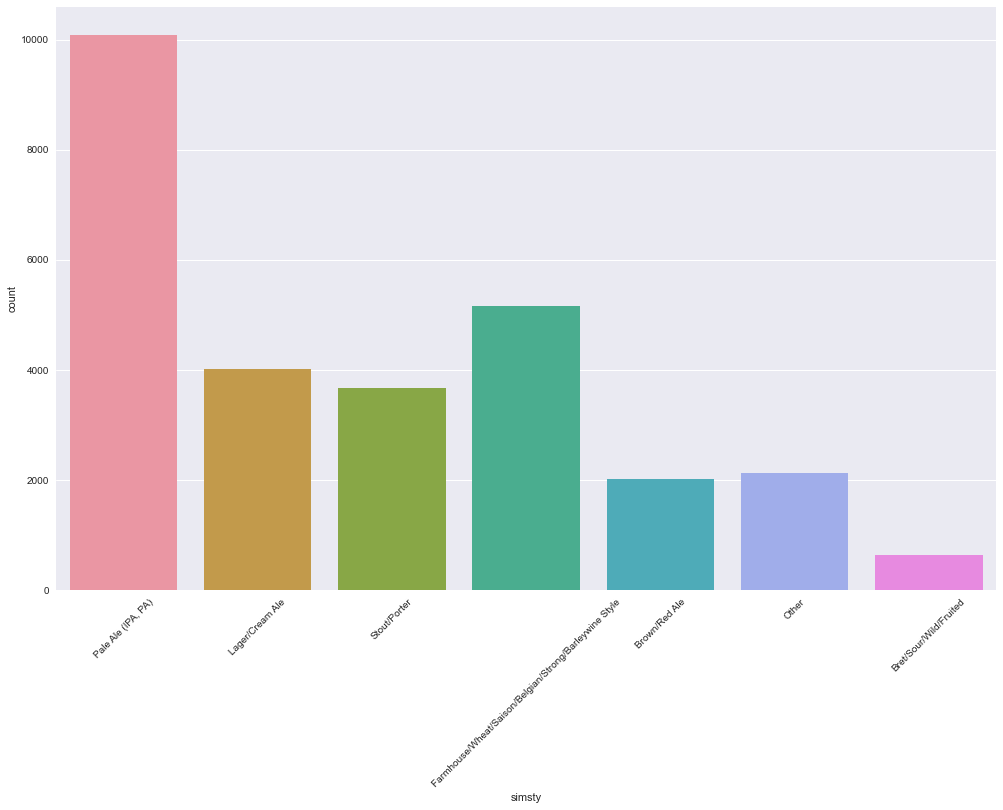

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,10))
sns.countplot('simsty', data=df)
plt.xticks(rotation = 45)
plt.savefig('7styles.jpeg');

In [115]:
simpler_style = []
for index, row in df.iterrows():
    if row.simsty == 'Stout/Porter' or row.simsty == 'Brown/Red Ale' or row.simsty == 'Farmhouse/Wheat/Saison/Belgian/Strong/Barleywine Style':
        simpler_style.append("Strong/Dark Ales")
    elif row.simsty == 'Pale Ale (IPA, PA)' or row.simsty == 'Lager/Cream Ale':
        simpler_style.append('Pale Ales and Lagers')
    else: 
        simpler_style.append("Other (Sours, Wild, Holiday styles)")
df['threesty'] = simpler_style

In [116]:
simpler_style2 = []
for index, row in df.iterrows():
    if row.simsty == 'Stout/Porter' or row.simsty == 'Brown/Red Ale' or row.simsty == 'Farmhouse/Wheat/Saison/Belgian/Strong/Barleywine Style':
        simpler_style2.append("Strong/Dark Ales")
    elif row.simsty == 'Pale Ale (IPA, PA)':
        simpler_style2.append('IPA/Pale Ales')
    elif row.simsty == 'Lager/Cream Ale':
        simpler_style2.append('Lager/Cream Ale')
    else: 
        simpler_style2.append("Other (Sours, Wild, Holiday styles)")
df['foursty'] = simpler_style2

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


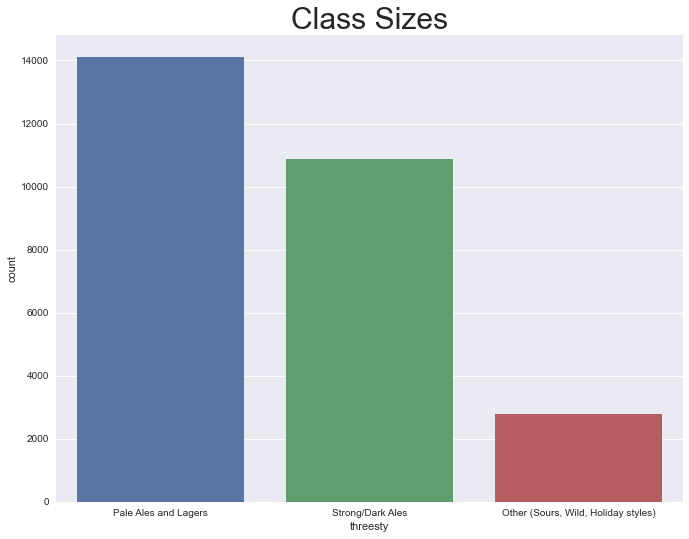

In [117]:
plt.figure(figsize=(10,8))
plt.title('Class Sizes', size = 30)
plt.style.use('seaborn')
sns.countplot('threesty', data = df)
plt.savefig('threesty_size.jpeg', bbox_inches='tight', 
               transparent= False,
               pad_inches=0)

In [118]:
df = df[df.bugu < 20]

In [119]:
df = df.drop_duplicates()

In [120]:
df.to_csv('clean_beer.csv')

In [51]:
df.columns

Index(['title', 'bstyle', 'og', 'fg', 'abv', 'ibu', 'srm', 'Mash pH', 'hops',
       'others', 'water', 'notes', 'IBU (rager)', 'SRM (daniels)',
       'SRM (ebcmorey)', 'SRM (mosher)', 'ABV (alternate)', 'yeast', 'chal',
       'citra', 'warrior', 'casc', 'saaz', 'azacca', 'colum', 'mag', 'perle',
       'simcoe', 'amar', 'willam', 'goldings', 'heller', 'fug', 'nugg',
       'hopshot', 'tett', 'mosaic', 'brewerg', 'northb', 'cent', 'chinook',
       'dryh', 'lact', 'clone', 'juicy', 'dank', 'wedding', 'whisk', 'trop',
       'award', 'best', 'smoke', 'roast', 'thick', 'heavy', 'stfruit', 'hazy',
       'pheno', 'banana', 'bitter', 'wylon', 'kveik', 'ipa', 'saison', 'lager',
       'stout', 'kolsch', 'wit', 'puree', 'lovehop'],
      dtype='object')

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [167]:
sub_df = df[['ipa', 'lager', 'stout','award','abv','og', 'fg', 'ibu', 'srm', 'chal', 'citra', 'warrior', 'casc', 'saaz', 'colum', 'mag', 'perle', 'simcoe', 'nugg', 'heller', 'fug' ]].dropna()

In [154]:
sub_df.describe()

,ipa,award,abv,og,fg,ibu,srm,chal,citra,warrior,casc,saaz,colum,mag,perle,simcoe,nugg,heller,fug
count,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000
mean,0.229729,0.026208,6.214647,1.062406,1.014509,44.196294,13.504613,0.022609,0.145836,0.038632,0.200799,0.090171,0.093902,0.099873,0.038193,0.097326,0.033188,0.000439,0.071206
std,0.420668,0.159758,1.855649,0.100015,0.020409,42.661496,12.051557,0.148655,0.352950,0.192721,0.400607,0.286433,0.291699,0.299837,0.191666,0.296408,0.179132,0.020948,0.257174
min,0.000000,0.000000,0.000000,1.000000,0.991000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.090000,1.051000,1.011000,22.830000,5.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.830000,1.058000,1.014000,34.540000,8.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,6.930000,1.069000,1.017000,55.830000,17.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,23.980000,15.897000,3.974000,2673.830000,108.650000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
X = sub_df.drop(columns =['ipa', 'award', 'lager', 'stout', 'srm'])
y= sub_df['stout']

In [217]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [218]:
from sklearn import preprocessing

In [219]:
X_train_pre = preprocessing.scale(X_train)
x_test_pre = preprocessing.scale(x_test)

In [220]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pre, y_train)

KNeighborsClassifier(n_neighbors=1)

In [221]:
knn.score(X_train_pre, y_train)

1.0

In [222]:
knn.score(x_test_pre,y_test)

0.8874012291483757

In [223]:
knn.predict(x_test_pre)

array([0, 0, 0, ..., 0, 0, 0])

In [224]:
logit = LogisticRegression()
logit.fit(X_train_pre,y_train)
logit.score(X_train_pre,y_train)

0.9172459208311993

In [225]:
logit.score(x_test_pre,y_test), logit.coef_

(0.9192273924495171,
 array([[-0.16111741,  0.07259047,  0.76406619,  0.03460299,  0.02326953,
         -0.3585538 , -0.00340869, -0.32184323, -0.27512218,  0.00103709,
          0.09024009, -0.02236427, -0.26263168,  0.15871169, -0.11653457,
          0.11270046]]))

In [226]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [227]:
bnb = BernoulliNB()
bnb.fit(X_train_pre,y_train)
bnb.score(X_train_pre,y_train), bnb.score(x_test_pre,y_test)

(0.9132947976878613, 0.9146180860403863)

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [229]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pre, y_train)

DecisionTreeClassifier()

In [230]:
dtc.score(x_test_pre, y_test)

0.8775241439859526

In [231]:
forest = RandomForestClassifier()
forest.fit(X_train_pre, y_train)

RandomForestClassifier()

In [232]:
forest.score(X_train_pre, y_train)

0.9999268310529011

In [233]:
forest.score(x_test_pre, y_test)

0.9253731343283582

In [234]:
from sklearn.svm import SVC

In [235]:
svc = SVC(probability = True)
svc.fit(X_train_pre, y_train)

SVC(probability=True)

In [236]:
svc.score(x_test_pre, y_test)

0.9229587357330992

In [239]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test_pre)[:,1])
fprlog, tprlog, thresholdslog = roc_curve(y_test, logit.predict_proba(x_test_pre)[:,1])
fprnb, tprnb, thresholdsnb = roc_curve(y_test, bnb.predict_proba(x_test_pre)[:,1])

fprrf, tprrf, thresholdsrf = roc_curve(y_test, forest.predict_proba(x_test_pre)[:,1])
fprdtc, tprdtc, thresholdsdtc = roc_curve(y_test, dtc.predict_proba(x_test_pre)[:,1])
fprsvc, tprsvc, thresholdssvc = roc_curve(y_test, svc.predict_proba(x_test_pre)[:,1])

KNN ROC AUC score =  0.6211269186704922
Logit ROC AUC score =  0.7930731414195108
Naive Bayes ROC AUC score =  0.7546244539898772
Random Forest ROC AUC score =  0.8163101436547269
Decision Tree ROC AUC score =  0.618295094740804
SVC ROC AUC score =  0.6793848368490387


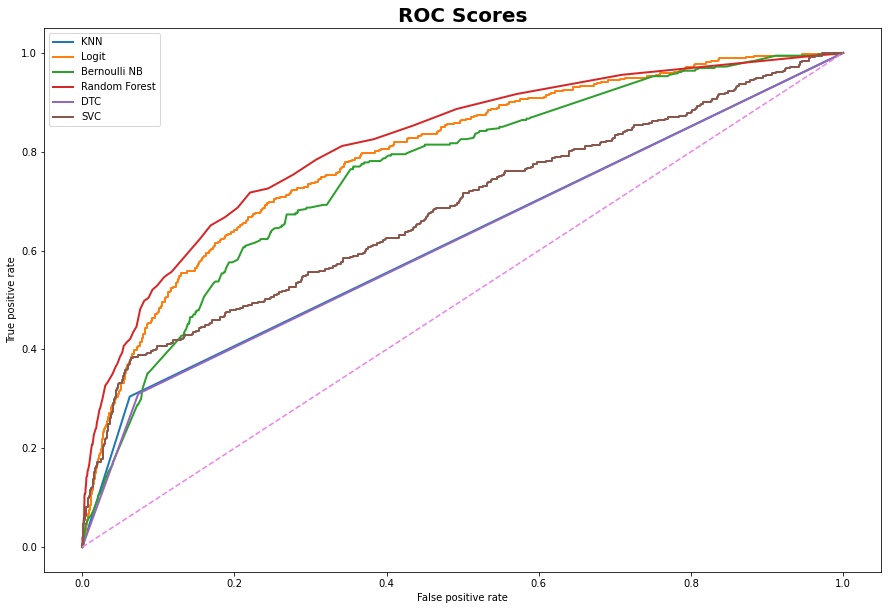

In [240]:
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr,lw=2)
plt.plot(fprlog, tprlog,lw=2)
plt.plot(fprnb, tprnb,lw=2)
#plt.plot(fprgnb, tprgnb,lw=2)
plt.plot(fprrf, tprrf,lw=2)
plt.plot(fprdtc, tprdtc,lw=2)
plt.plot(fprsvc, tprsvc,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Scores', fontweight="bold", fontsize=20);
plt.legend(['KNN','Logit', 'Bernoulli NB', 'Random Forest', 'DTC', 'SVC'])
print("KNN ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(x_test_pre)[:,1]))
print("Logit ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(x_test_pre)[:,1]))
print("Naive Bayes ROC AUC score = ", roc_auc_score(y_test, bnb.predict_proba(x_test_pre)[:,1]))
#print("Naive Bayes ROC AUC score = ", roc_auc_score(y_test, gnb.predict_proba(x_test_pre)[:,1]))
print("Random Forest ROC AUC score = ", roc_auc_score(y_test, forest.predict_proba(x_test_pre)[:,1]))
print("Decision Tree ROC AUC score = ", roc_auc_score(y_test, dtc.predict_proba(x_test_pre)[:,1]))
print("SVC ROC AUC score = ", roc_auc_score(y_test, svc.predict_proba(x_test_pre)[:,1]))

In [191]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, f1_score, accuracy_score

In [192]:
from sklearn.metrics import confusion_matrix

Precision Score:  0.6825842696629213
Recall Score:  0.6877358490566038
Accuracy :  0.8521297726771132


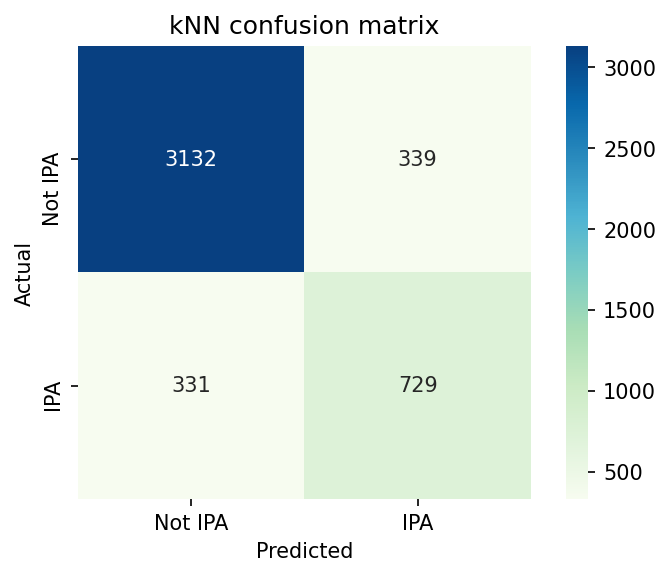

In [80]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(y_test, knn.predict(x_test_pre))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'], fmt = 'g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN confusion matrix')
print("Precision Score: ", precision_score(y_test,knn.predict(x_test_pre)))
print("Recall Score: ", recall_score(y_test,knn.predict(x_test_pre)))
print("Accuracy : ", accuracy_score(y_test, knn.predict(x_test_pre)));

Precision Score:  1.0
Recall Score:  1.0
Accuracy :  1.0


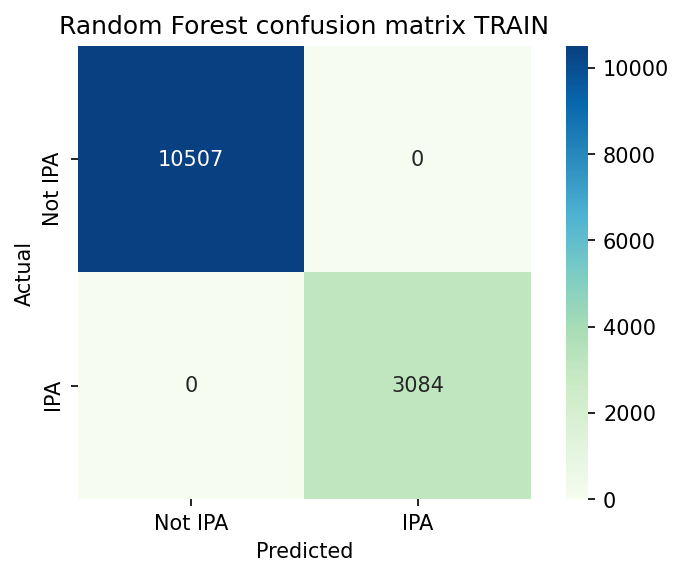

In [81]:
# Print confusion matrix for Random Forest TRAIN
rf_confusion = confusion_matrix(y_train, forest.predict(X_train_pre))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'], fmt = 'g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest confusion matrix TRAIN')
print("Precision Score: ", precision_score(y_train,forest.predict(X_train_pre)))
print("Recall Score: ", recall_score(y_train,forest.predict(X_train_pre)))
print("Accuracy : ", accuracy_score(y_train, forest.predict(X_train_pre)));

Precision Score:  0.8601997146932953
Recall Score:  0.5688679245283019
Accuracy :  0.8775104833370116


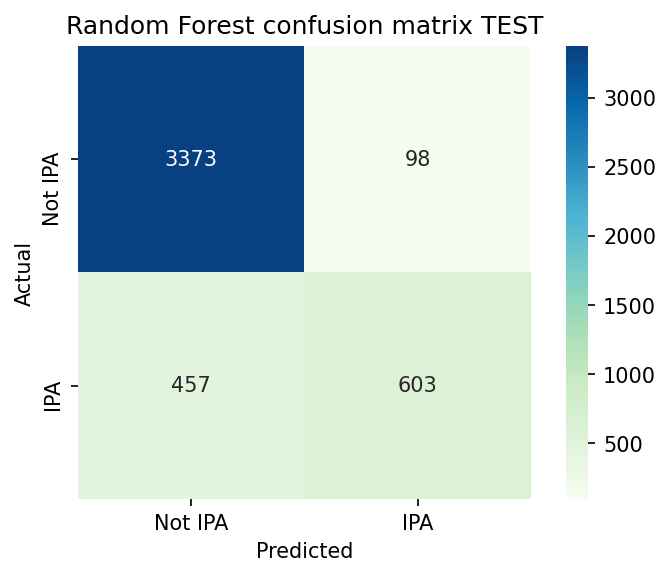

In [82]:
# Print confusion matrix for Random Forest
rf_confusion = confusion_matrix(y_test, forest.predict(x_test_pre))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'], fmt = 'g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest confusion matrix TEST')
print("Precision Score: ", precision_score(y_test,forest.predict(x_test_pre)))
print("Recall Score: ", recall_score(y_test,forest.predict(x_test_pre)))
print("Accuracy : ", accuracy_score(y_test, forest.predict(x_test_pre)));

Precision Score:  0.7812210915818686
Recall Score:  0.5476653696498055
Accuracy :  0.8625561033036568


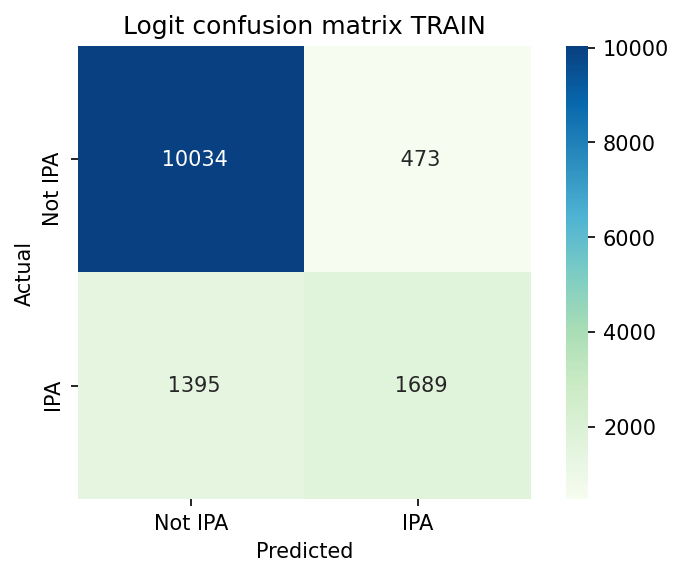

In [83]:
# Print confusion matrix for logit
log_confusion_tr = confusion_matrix(y_train, logit.predict(X_train_pre))
plt.figure(dpi=150)
sns.heatmap(log_confusion_tr, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'], fmt = ' g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logit confusion matrix TRAIN')
print("Precision Score: ", precision_score(y_train,logit.predict(X_train_pre)))
print("Recall Score: ", recall_score(y_train,logit.predict(X_train_pre)))
print("Accuracy : ", accuracy_score(y_train, logit.predict(X_train_pre)));

Precision Score:  0.7750294464075382
Recall Score:  0.620754716981132
Accuracy :  0.8691238137276539


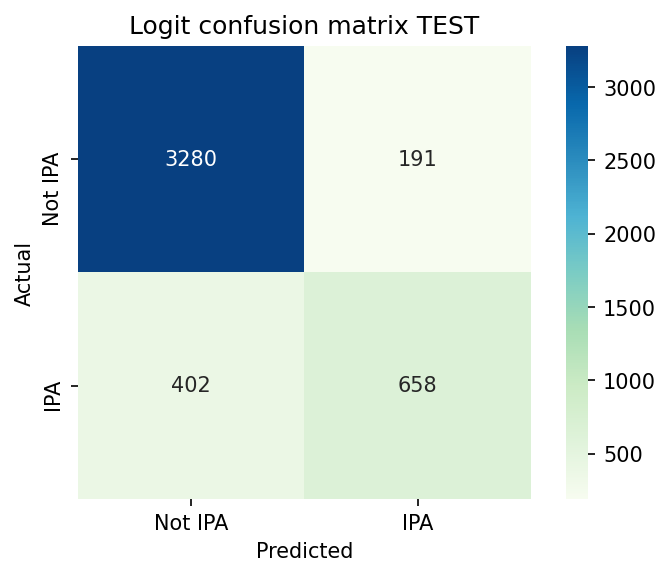

In [84]:
# Print confusion matrix for logit
log_confusion = confusion_matrix(y_test, logit.predict(x_test_pre))
plt.figure(dpi=150)
sns.heatmap(log_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'], fmt = 'g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logit confusion matrix TEST')
print("Precision Score: ", precision_score(y_test,logit.predict(x_test_pre)))
print("Recall Score: ", recall_score(y_test,logit.predict(x_test_pre)))
print("Accuracy : ", accuracy_score(y_test, logit.predict(x_test_pre)));

Precision Score:  0.6497777777777778
Recall Score:  0.689622641509434
Accuracy :  0.8404325755903774


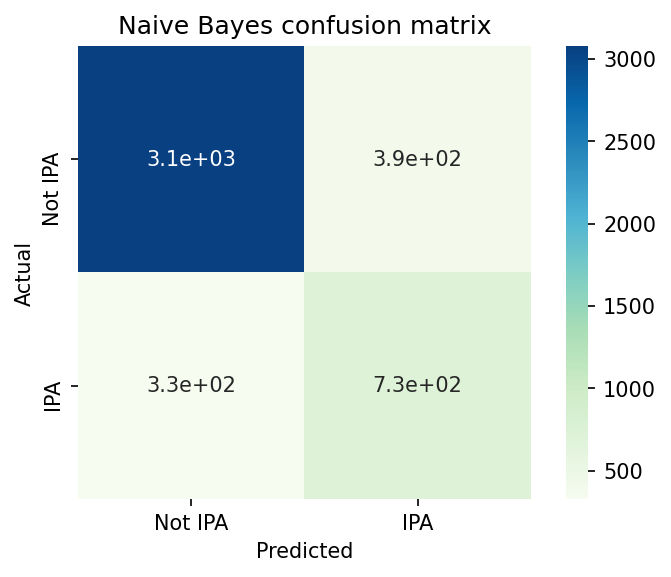

In [88]:
# Print confusion matrix for Naive Bayes
bnb_confusion = confusion_matrix(y_test, bnb.predict(x_test_pre))
plt.figure(dpi=150)
sns.heatmap(bnb_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes confusion matrix')
print("Precision Score: ", precision_score(y_test,bnb.predict(x_test_pre)))
print("Recall Score: ", recall_score(y_test,bnb.predict(x_test_pre)))
print("Accuracy : ", accuracy_score(y_test,bnb.predict(x_test_pre)));

Precision Score:  0.8142857142857143
Recall Score:  0.6990566037735849
Accuracy :  0.8922975060693004


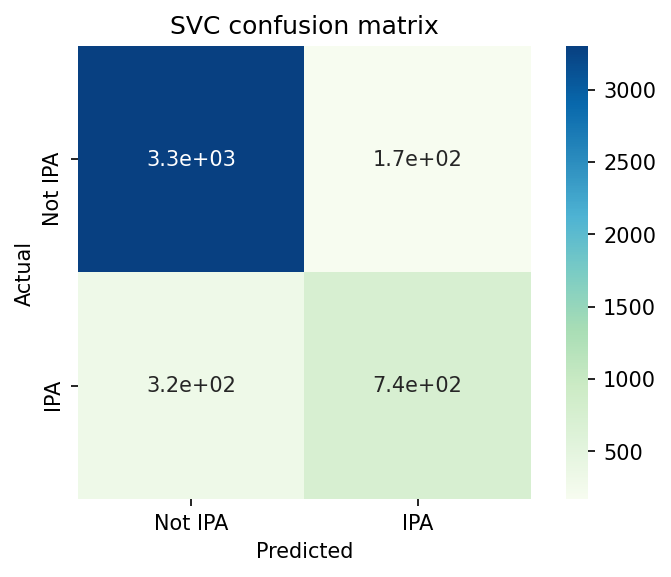

In [89]:
# Print confusion matrix for Naive Bayes
svc_confusion = confusion_matrix(y_test, svc.predict(x_test_pre))
plt.figure(dpi=150)
sns.heatmap(svc_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC confusion matrix')
print("Precision Score: ", precision_score(y_test,svc.predict(x_test_pre)))
print("Recall Score: ", recall_score(y_test,svc.predict(x_test_pre)))
print("Accuracy : ", accuracy_score(y_test, svc.predict(x_test_pre)));

In [90]:
sub_df = df[['dryh','abv','og', 'fg', 'ibu', 'srm', 'chal', 'citra', 'warrior', 'casc', 'saaz', 'colum', 'mag', 'perle', 'simcoe', 'nugg', 'heller', 'fug']].dropna()

In [91]:
X = sub_df.drop(columns ='dryh')
y= sub_df['dryh']

In [92]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [93]:
from sklearn import preprocessing

In [94]:
X_train_pre = preprocessing.scale(X_train)
x_test_pre = preprocessing.scale(x_test)

In [95]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pre, y_train)

KNeighborsClassifier(n_neighbors=1)

In [96]:
knn.score(X_train_pre, y_train)

0.999117062762122

In [97]:
knn.score(x_test_pre,y_test)

0.7298609578459502

In [98]:
knn.predict(x_test_pre)

array([0, 0, 1, ..., 1, 1, 0])

In [99]:
logit = LogisticRegression()
logit.fit(X_train_pre,y_train)
logit.score(X_train_pre,y_train)

0.7909646089323817

In [100]:
logit.score(x_test_pre,y_test), logit.coef_

(0.7821672919885235,
 array([[ 0.18369156, -0.053238  , -0.01379278,  0.31722115, -0.41894107,
         -0.02622293,  0.73644693,  0.12029842,  0.301927  , -0.31682313,
          0.29686806,  0.07394402, -0.05945921,  0.50767525,  0.00704453,
         -0.01650294, -0.17444575]]))

In [101]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [102]:
nb = BernoulliNB()
nb.fit(X_train_pre,y_train)
nb.score(X_train_pre,y_train), nb.score(x_test_pre,y_test)

(0.7820616584504452, 0.7801809755020966)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pre, y_train)

DecisionTreeClassifier()

In [105]:
dtc.score(x_test_pre, y_test)

0.7088942838225557

In [106]:
forest = RandomForestClassifier()
forest.fit(X_train_pre, y_train)

RandomForestClassifier()

In [107]:
forest.score(X_train_pre, y_train)

0.999117062762122

In [108]:
forest.score(x_test_pre, y_test)

0.78922975060693

In [109]:
from sklearn.svm import SVC

In [110]:
svc = SVC(probability = True)
svc.fit(X_train_pre, y_train)

SVC(probability=True)

In [111]:
svc.score(x_test_pre, y_test)

0.7808430809975723

In [112]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test_pre)[:,1])
fprlog, tprlog, thresholdslog = roc_curve(y_test, logit.predict_proba(x_test_pre)[:,1])
fprnb, tprnb, thresholdsnb = roc_curve(y_test, nb.predict_proba(x_test_pre)[:,1])
fprrf, tprrf, thresholdsrf = roc_curve(y_test, forest.predict_proba(x_test_pre)[:,1])
fprdtc, tprdtc, thresholdsdtc = roc_curve(y_test, dtc.predict_proba(x_test_pre)[:,1])
fprsvc, tprsvc, thresholdssvc = roc_curve(y_test, svc.predict_proba(x_test_pre)[:,1])

KNN ROC AUC score =  0.7004311008468053
Logit ROC AUC score =  0.8220908391070054
Naive Bayes ROC AUC score =  0.8057377103266248
Random Forest ROC AUC score =  0.835653139777851
Decision Tree ROC AUC score =  0.680182118112834
SVC ROC AUC score =  0.7870443198064445


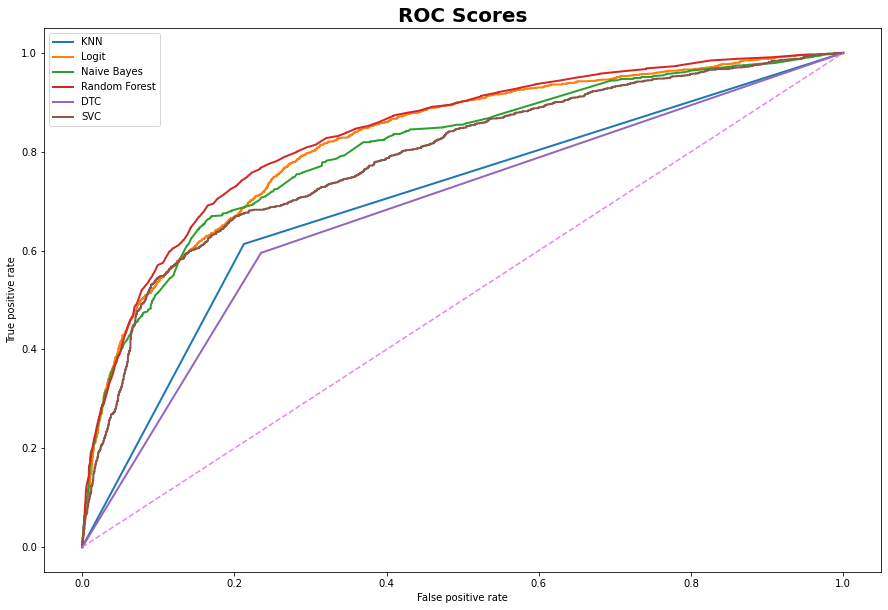

In [113]:
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr,lw=2)
plt.plot(fprlog, tprlog,lw=2)
plt.plot(fprnb, tprnb,lw=2)
plt.plot(fprrf, tprrf,lw=2)
plt.plot(fprdtc, tprdtc,lw=2)
plt.plot(fprsvc, tprsvc,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Scores', fontweight="bold", fontsize=20);
plt.legend(['KNN','Logit', 'Naive Bayes', 'Random Forest', 'DTC', 'SVC'])
print("KNN ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(x_test_pre)[:,1]))
print("Logit ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(x_test_pre)[:,1]))
print("Naive Bayes ROC AUC score = ", roc_auc_score(y_test, nb.predict_proba(x_test_pre)[:,1]))
print("Random Forest ROC AUC score = ", roc_auc_score(y_test, forest.predict_proba(x_test_pre)[:,1]))
print("Decision Tree ROC AUC score = ", roc_auc_score(y_test, dtc.predict_proba(x_test_pre)[:,1]))
print("SVC ROC AUC score = ", roc_auc_score(y_test, svc.predict_proba(x_test_pre)[:,1]))

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26988 entries, 0 to 27144
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            18192 non-null  object 
 1   bstyle           26988 non-null  object 
 2   og               26100 non-null  float64
 3   fg               26100 non-null  float64
 4   abv              26272 non-null  float64
 5   ibu              25822 non-null  float64
 6   srm              24694 non-null  float64
 7   Mash pH          2661 non-null   float64
 8   hops             26988 non-null  object 
 9   others           26988 non-null  object 
 10  water            26988 non-null  object 
 11  notes            26988 non-null  object 
 12  IBU (rager)      1166 non-null   float64
 13  SRM (daniels)    899 non-null    float64
 14  SRM (ebcmorey)   1071 non-null   float64
 15  SRM (mosher)     324 non-null    float64
 16  ABV (alternate)  716 non-null    object 
 17  yeast       

In [115]:
sub_df = df[['saison','abv','og', 'fg', 'ibu', 'srm', 'chal', 'citra', 'warrior', 'casc', 'saaz', 'colum', 'mag', 'perle', 'simcoe', 'nugg', 'heller', 'fug']].dropna()

In [116]:
sub_df.describe()

,saison,abv,og,fg,ibu,srm,chal,citra,warrior,casc,saaz,colum,mag,perle,simcoe,nugg,heller,fug
count,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000,22653.000000
mean,0.030018,6.214707,1.062412,1.014510,44.200426,13.514917,0.022425,0.145941,0.038759,0.201033,0.090143,0.094027,0.099854,0.038229,0.097426,0.033285,0.000441,0.071337
std,0.170641,1.854985,0.100281,0.020461,42.707804,12.061076,0.148065,0.353055,0.193024,0.400781,0.286392,0.291873,0.299812,0.191753,0.296544,0.179383,0.021006,0.257393
min,0.000000,0.000000,1.000000,0.991000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.090000,1.051000,1.011000,22.830000,5.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.830000,1.058000,1.014000,34.540000,8.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,6.930000,1.069000,1.017000,55.830000,17.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,23.980000,15.897000,3.974000,2673.830000,108.650000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
X = sub_df.drop(columns ='saison')
y= sub_df['saison']

In [118]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [119]:
X_train_pre = preprocessing.scale(X_train)
x_test_pre = preprocessing.scale(x_test)

In [120]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pre, y_train)

KNeighborsClassifier(n_neighbors=1)

In [121]:
knn.score(X_train_pre, y_train)

1.0

In [122]:
knn.score(x_test_pre,y_test)

0.9201059368792761

In [123]:
knn.predict(x_test_pre)

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
logit = LogisticRegression()
logit.fit(X_train_pre,y_train)
logit.score(X_train_pre,y_train)

0.9708630711500258

In [125]:
logit.score(x_test_pre,y_test), logit.coef_

(0.9304789229750607,
 array([[ 0.40190145, -0.3928317 , -2.30772578, -0.41431419, -1.02099156,
         -0.07285632, -0.18215594,  0.02049836, -0.33838061,  0.15959657,
         -0.05424772,  0.00743268, -0.05980404, -0.26279634, -0.00532156,
         -0.08579589, -0.06552499]]))

In [126]:
nb = BernoulliNB()
nb.fit(X_train_pre,y_train)
nb.score(X_train_pre,y_train), nb.score(x_test_pre,y_test)

(0.9713045397689648, 0.965349812403443)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [128]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pre, y_train)

DecisionTreeClassifier()

In [129]:
dtc.score(x_test_pre, y_test)

0.9099536526153167

In [130]:
forest = RandomForestClassifier()
forest.fit(X_train_pre, y_train)

RandomForestClassifier()

In [131]:
forest.score(X_train_pre, y_train)

1.0

In [132]:
forest.score(x_test_pre, y_test)

0.9618185830942397

In [133]:
from sklearn.svm import SVC

In [134]:
svc = SVC(probability = True)
svc.fit(X_train_pre, y_train)

SVC(probability=True)

In [135]:
svc.score(x_test_pre, y_test)

0.965349812403443

In [136]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test_pre)[:,1])
fprlog, tprlog, thresholdslog = roc_curve(y_test, logit.predict_proba(x_test_pre)[:,1])
fprnb, tprnb, thresholdsnb = roc_curve(y_test, nb.predict_proba(x_test_pre)[:,1])
fprrf, tprrf, thresholdsrf = roc_curve(y_test, forest.predict_proba(x_test_pre)[:,1])
fprdtc, tprdtc, thresholdsdtc = roc_curve(y_test, dtc.predict_proba(x_test_pre)[:,1])
fprsvc, tprsvc, thresholdssvc = roc_curve(y_test, svc.predict_proba(x_test_pre)[:,1])

KNN ROC AUC score =  0.6300861488995482
Logit ROC AUC score =  0.734227150009174
Naive Bayes ROC AUC score =  0.7447431114373002
Random Forest ROC AUC score =  0.8041889101494355
Decision Tree ROC AUC score =  0.6125461980026736
SVC ROC AUC score =  0.6652439574905565


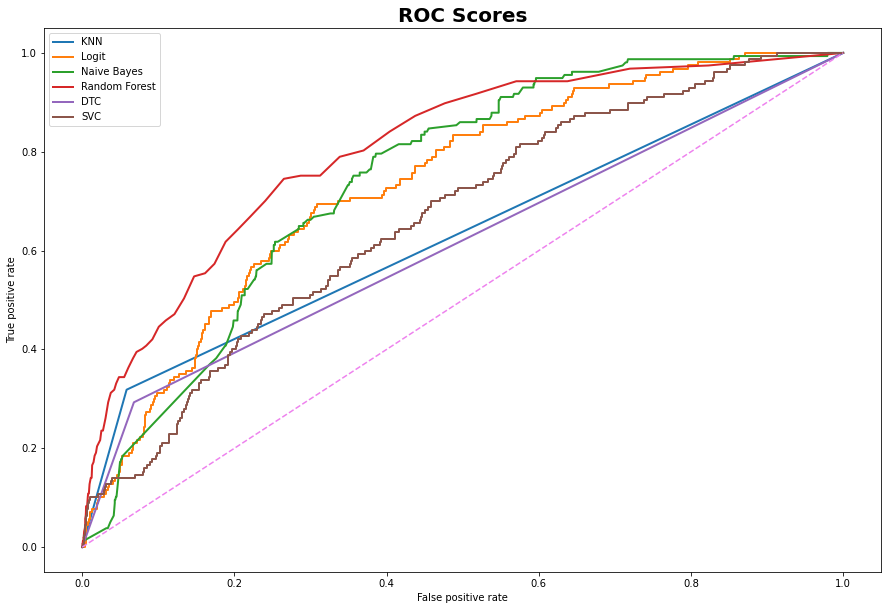

In [137]:
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr,lw=2)
plt.plot(fprlog, tprlog,lw=2)
plt.plot(fprnb, tprnb,lw=2)
plt.plot(fprrf, tprrf,lw=2)
plt.plot(fprdtc, tprdtc,lw=2)
plt.plot(fprsvc, tprsvc,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Scores', fontweight="bold", fontsize=20);
plt.legend(['KNN','Logit', 'Naive Bayes', 'Random Forest', 'DTC', 'SVC'])
print("KNN ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(x_test_pre)[:,1]))
print("Logit ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(x_test_pre)[:,1]))
print("Naive Bayes ROC AUC score = ", roc_auc_score(y_test, nb.predict_proba(x_test_pre)[:,1]))
print("Random Forest ROC AUC score = ", roc_auc_score(y_test, forest.predict_proba(x_test_pre)[:,1]))
print("Decision Tree ROC AUC score = ", roc_auc_score(y_test, dtc.predict_proba(x_test_pre)[:,1]))
print("SVC ROC AUC score = ", roc_auc_score(y_test, svc.predict_proba(x_test_pre)[:,1]))

In [138]:
df.to_csv('26k.csv')

In [139]:
df.columns

Index(['title', 'bstyle', 'og', 'fg', 'abv', 'ibu', 'srm', 'Mash pH', 'hops',
       'others', 'water', 'notes', 'IBU (rager)', 'SRM (daniels)',
       'SRM (ebcmorey)', 'SRM (mosher)', 'ABV (alternate)', 'yeast', 'chal',
       'citra', 'warrior', 'casc', 'saaz', 'azacca', 'colum', 'mag', 'perle',
       'simcoe', 'amar', 'willam', 'goldings', 'heller', 'fug', 'nugg',
       'hopshot', 'tett', 'mosaic', 'brewerg', 'northb', 'cent', 'chinook',
       'dryh', 'lact', 'clone', 'juicy', 'dank', 'wedding', 'whisk', 'trop',
       'award', 'best', 'smoke', 'roast', 'thick', 'heavy', 'stfruit', 'hazy',
       'pheno', 'banana', 'bitter', 'wylon', 'kveik', 'ipa', 'saison', 'lager',
       'stout', 'kolsch', 'wit', 'puree', 'lovehop'],
      dtype='object')

In [140]:
sub_df = df[['ipa', 'saison', 'lager', 'stout', 'kolsch', 'wit','award', 'dryh', 'lact', 'clone', 'juicy', 'dank', 'wedding', 'whisk', 'trop',\
             'award', 'best', 'smoke', 'roast', 'thick', 'heavy', 'stfruit', 'hazy',\
             'pheno', 'banana', 'bitter', 'wylon', 'kveik', 'puree', 'lovehop']].dropna()

In [141]:
sub_df.describe()

,ipa,saison,lager,stout,kolsch,wit,award,dryh,lact,clone,...,heavy,stfruit,hazy,pheno,banana,bitter,wylon,kveik,puree,lovehop
count,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,...,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000
mean,0.231473,0.031533,0.035053,0.086631,0.012042,0.018341,0.026123,0.335705,0.012858,0.008004,...,0.005039,0.001371,0.002964,0.001075,0.004409,0.041352,0.020565,0.008782,0.014933,0.000482
std,0.421782,0.174755,0.183916,0.281299,0.109077,0.134185,0.159503,0.472245,0.112662,0.089106,...,0.070810,0.037002,0.054365,0.032763,0.066258,0.199106,0.141924,0.093300,0.121285,0.021943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
X = sub_df.drop(columns =['ipa', 'saison', 'lager', 'stout', 'kolsch', 'wit'])
y= sub_df[['ipa','saison']]

In [143]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [144]:
from sklearn import preprocessing

In [145]:
X_train_pre = preprocessing.scale(X_train)
x_test_pre = preprocessing.scale(x_test)

In [146]:
knn = KNeighborsClassifier()
knn.fit(X_train_pre, y_train)

KNeighborsClassifier()

In [147]:
knn.score(X_train_pre, y_train)

0.7414772727272727

In [148]:
knn.score(x_test_pre,y_test)

0.7378658762504632

In [149]:
knn.predict(x_test_pre)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [150]:
logit = LogisticRegression()
logit.fit(X_train_pre,y_train)
logit.score(X_train_pre,y_train)

ValueError: y should be a 1d array, got an array of shape (16192, 2) instead.

In [ ]:
logit.score(x_test_pre,y_test), logit.coef_

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
nb = BernoulliNB()
nb.fit(X_train_pre,y_train)
nb.score(X_train_pre,y_train), nb.score(x_test_pre,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pre, y_train)

In [ ]:
dtc.score(x_test_pre, y_test)

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train_pre, y_train)

In [ ]:
forest.score(X_train_pre, y_train)

In [ ]:
forest.score(x_test_pre, y_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(probability = True)
svc.fit(X_train_pre, y_train)

In [ ]:
svc.score(x_test_pre, y_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test_pre)[:,1])
fprlog, tprlog, thresholdslog = roc_curve(y_test, logit.predict_proba(x_test_pre)[:,1])
fprnb, tprnb, thresholdsnb = roc_curve(y_test, nb.predict_proba(x_test_pre)[:,1])
fprrf, tprrf, thresholdsrf = roc_curve(y_test, forest.predict_proba(x_test_pre)[:,1])
fprdtc, tprdtc, thresholdsdtc = roc_curve(y_test, dtc.predict_proba(x_test_pre)[:,1])
fprsvc, tprsvc, thresholdssvc = roc_curve(y_test, svc.predict_proba(x_test_pre)[:,1])

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr,lw=2)
plt.plot(fprlog, tprlog,lw=2)
plt.plot(fprnb, tprnb,lw=2)
plt.plot(fprrf, tprrf,lw=2)
plt.plot(fprdtc, tprdtc,lw=2)
plt.plot(fprsvc, tprsvc,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Scores', fontweight="bold", fontsize=20);
plt.legend(['KNN','Logit', 'Naive Bayes', 'Random Forest', 'DTC', 'SVC'])
print("KNN ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(x_test_pre)[:,1]))
print("Logit ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(x_test_pre)[:,1]))
print("Naive Bayes ROC AUC score = ", roc_auc_score(y_test, nb.predict_proba(x_test_pre)[:,1]))
print("Random Forest ROC AUC score = ", roc_auc_score(y_test, forest.predict_proba(x_test_pre)[:,1]))
print("Decision Tree ROC AUC score = ", roc_auc_score(y_test, dtc.predict_proba(x_test_pre)[:,1]))
print("SVC ROC AUC score = ", roc_auc_score(y_test, svc.predict_proba(x_test_pre)[:,1]))

In [ ]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, f1_score, accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(y_test, knn.predict(x_test_pre))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN confusion matrix')
print("Precision Score: ", precision_score(y_test,knn.predict(x_test_pre)))
print("Recall Score: ", recall_score(y_test,knn.predict(x_test_pre)))
print("Accuracy : ", accuracy_score(y_test, knn.predict(x_test_pre)));

In [ ]:
# Print confusion matrix for Random Forest
rf_confusion = confusion_matrix(y_test, forest.predict(x_test_pre))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest confusion matrix')
print("Precision Score: ", precision_score(y_test,forest.predict(x_test_pre)))
print("Recall Score: ", recall_score(y_test,forest.predict(x_test_pre)))
print("Accuracy : ", accuracy_score(y_test, forest.predict(x_test_pre)));

In [ ]:
# Print confusion matrix for logit
log_confusion = confusion_matrix(y_test, logit.predict(x_test_pre))
plt.figure(dpi=150)
sns.heatmap(log_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logit confusion matrix')
print("Precision Score: ", precision_score(y_test,logit.predict(x_test_pre)))
print("Recall Score: ", recall_score(y_test,logit.predict(x_test_pre)))
print("Accuracy : ", accuracy_score(y_test, logit.predict(x_test_pre)));

In [ ]:
# Print confusion matrix for Naive Bayes
nb_confusion = confusion_matrix(y_test, nb.predict(x_test_pre))
plt.figure(dpi=150)
sns.heatmap(nb_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes confusion matrix')
print("Precision Score: ", precision_score(y_test,nb.predict(x_test_pre)))
print("Recall Score: ", recall_score(y_test,nb.predict(x_test_pre)))
print("Accuracy : ", accuracy_score(y_test, nb.predict(x_test_pre)));

In [ ]:
# Print confusion matrix for Naive Bayes
svc_confusion = confusion_matrix(y_test, svc.predict(x_test_pre))
plt.figure(dpi=150)
sns.heatmap(svc_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Not IPA', 'IPA'],
           yticklabels=['Not IPA', 'IPA'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC confusion matrix')
print("Precision Score: ", precision_score(y_test,svc.predict(x_test_pre)))
print("Recall Score: ", recall_score(y_test,svc.predict(x_test_pre)))
print("Accuracy : ", accuracy_score(y_test, svc.predict(x_test_pre)));

In [ ]:
import dtale

In [ ]:
notes = df.notes

In [ ]:
dtale.show(notes, ignore_duplicate = True)

In [ ]:
dtale.show(df)

In [ ]:
dtale.show(yeast)